<a href="https://colab.research.google.com/github/khanfs/ComputationalBiology-xGenomics/blob/main/PDB_APIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Protein Data Bank APIs**
PyPDB and Biotite packages provide Protein Data Bank (PDB) APIs. Outlined is code to install them and examples of querying the PDB - using Biotite to filter structures by given criteria and PyPDB to download metadata and structural files. 
### **Research Collaboratory for Structural Bioinformatics PDB**
The [RCSB Protein Data Bank](https://www.rcsb.org/) is a structural biology database consisting of 3D structures of proteins, nucleic acids and [complex assemblies](https://www.ebi.ac.uk/QuickGO/term/GO:0034622). Experiments comprising *X-ray crystallography*, the de facto method for decades, *nuclear magnetic resonance (NMR)*, and *cryo-electron microscopy (cryo-EM)* generate structural data. cryo-EM is rapidly replacing X-ray crystallography, which is over a century old. PDB contains over **160,000 protein structures**. Each entry contains:

1. 3D coordinates of the atoms and the bonds connecting these atoms for proteins, ligand, cofactors, water molecules, and ions
2. 3D visualisations of the protein structures, with ligand interactions if available
3. meta-information on the structural data, e.g.'s, the PDB ID, the authors, the deposition date, the structural determination method used
4. structural quality metrics - structural resolution - it measures the collected data quality, which has the unit Å (Angstrom); the lower the value, the higher the quality of the structure.

**Resources:**
* [PDB Meta-information list of fields for chemicals](https://search.rcsb.org/chemical-search-attributes.html)
* [PDB Meta-information list of fields for structures](https://search.rcsb.org/structure-search-attributes.html) 

**References:**
* Rose, P. W., Prlić, A., Altunkaya, A., Bi, C., Bradley, A. R., Christie, C. H., Costanzo, L. D., Duarte, J. M., Dutta, S., Feng, Z., Green, R. K., Goodsell, D. S., Hudson, B., Kalro, T., Lowe, R., Peisach, E., Randle, C., Rose, A. S., Shao, C., Tao, Y. P., … Burley, S. K. (2017). The RCSB protein data bank: integrative view of protein, gene and 3D structural information. Nucleic acids research, 45(D1), D271–D281. [https://doi.org/10.1093/nar/gkw1000](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5210513/)
* Berman, H. M., Westbrook, J., Feng, Z., Gilliland, G., Bhat, T. N., Weissig, H., Shindyalov, I. N., & Bourne, P. E. (2000). The Protein Data Bank. Nucleic acids research, 28(1), 235–242. [https://doi.org/10.1093/nar/28.1.235](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC102472/)

In [1]:
# Install Conda environment
! pip install -q condacolab

In [2]:
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [33]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# **1. PyPDB**
PyPDB can search the PDB by keyword, author, publication date and experimental method, as well as by specific sequence motifs. For individual PDB IDs, retrievable information ranges from metadata (date of posting, authors, etc.) to the full. pdb data file stored with an entry. Standard information such as gene ontology, ligand information and protein family information can be accessed. PyPDB can also perform BLAST searches (Gilpin, 2016). The Python package pypdb offers an interface for the PDB to not only query for PDB IDs but also to download associated metadata and structural files. 

**Resources:**

* [Primary PyPDB functions](https://academic.oup.com/view-large/35641249)
* [Functions for searching the RCSB PDB for lists of PDB IDs](https://github.com/williamgilpin/pypdb/blob/master/pypdb/pypdb.py)

**References:**

*  William Gilpin, PyPDB: a Python API for the Protein Data Bank, Bioinformatics, Volume 32, Issue 1, 1 January 2016, Pages 159–160, [https://doi.org/10.1093/bioinformatics/btv543](https://academic.oup.com/bioinformatics/article/32/1/159/1743800) 

In [4]:
# Install PyPDB 
! pip install pypdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
! pytest

============================= test session starts ==============================
platform linux -- Python 3.7.13, pytest-3.6.4, py-1.11.0, pluggy-0.7.1
rootdir: /content, inifile:
plugins: typeguard-2.7.1
collected 0 items                                                              

========================= no tests ran in 0.00 seconds =========================


## **PyPDB Functions**

There are generally 3 types of functions:

* Functions that perform searches and return lists of PDB IDs
* Functions that get information about specific PDB IDs
* Other general-purpose lookup functions

In [6]:
# (*) will import every function from the pydb package
from pypdb import *

### 1. Get a list of PDBs for a specific search term

In [7]:
found_pdbs = Query('ACE2').search()
print(found_pdbs)

['7U0N', '7JVO', '6M1D', '6M18', '1R4L', '1R42', '7RPV', '6M17', '6ACD', '6ACC', '7DK3', '7V61', '7KMB', '7DF4', '6VW1', '7DF3', '6ACK', '6ACJ', '6ACG', '7WRV', '7C8D', '7A93', '7KNI', '7KNH', '7KNE', '7KNB', '7KMZ', '7KMS', '3D0I', '3D0H', '3D0G', '2G75', '7XO5', '7WPC', '7WPB', '7WPA', '7VX5', '7VX4', '7V8A', '7V89', '7V88', '7T9K', '7KJ4', '7KJ3', '7KJ2', '7DMU', '7A98', '7A97', '7A96', '7A95', '7A94', '7A92', '7A91', '6M0J', '6LZG', '7W9I', '7WP9', '7KJ5', '7JWY', '6XM5', '6XM4', '6XM3', '6XM0', '6XLU', '7WPF', '7WPE', '7WPD', '7XOC', '7XOB', '7XOA', '7XO9', '7XO8', '7XO7', '7XO6', '7XO4', '7VXM', '7VXK', '7VXF', '7VXD', '7VXA', '7VX9', '7MJN', '7MJM', '7EFR', '7EFP', '7WEV', '7VXI', '7VXE', '7VX1', '7F5R', '7W9C', '7W9B', '7W99', '7W98', '7E7E', '7XOD', '7T9J', '7E3J', '7W94', '7W92', '2DD8', '7VXC', '7VXB', '7V86', '7V85', '7V83', '7V82', '7V81', '7V7Z', '7TEZ', '7TEW', '7T9L', '7SY8', '7SY6', '7SY4', '7SY2', '7SY0', '7SXY', '7EDJ', '7DX8', '7DX6', '3SCL', '3SCK', '7DDP', '7DDO',

### 2. Search by PubMed ID Number


In [8]:
found_pdbs = Query('34132541', 'PubmedIdQuery').search()
print(found_pdbs)

None


/usr/local/lib/python3.7/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/usr/local/lib/python3.7/site-packages/pypdb/pypdb.py:292: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


### 3. Search by source organism using NCBI TaxId


In [9]:
found_pdbs = Query('6239', 'TreeEntityQuery').search() #TaxID for C elegans
print(found_pdbs[:5])

['1D4X', '1DYW', '1E3B', '1E8K', '1EMS']


# **2. Biotite**
[Biotite](https://www.biotite-python.org/) is an open source comprehensive computational molecular biology framework for analysis of sequence and structure data, where most of the data can be handled internally, without the usage of additional software. It handles the complete bioinformatics workflow, from fetching, reading and writing relevant files to the efficient and intuitive analysis and manipulation of data (Kunzmann, P., Hamacher, K., 2018). Biotite provides read and write capabilities for the FASTA format, hence FASTA files can be used to load and save nucleotide and protein sequences. Biotite makes heavy use of NumPy and some code is written in [Cython](https://cython.org/), resulting in performance comparable to native C code.

**Resources:**

* [API Reference](https://www.biotite-python.org/apidoc/index.html)

**References:**

* Kunzmann, P., Hamacher, K. Biotite: a unifying open source computational biology framework in Python. BMC Bioinformatics 19, 346 (2018). [https://doi.org/10.1186/s12859-018-2367-z](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-018-2367-z#citeas)

In [10]:
# Install Biotite
! pip install biotite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Biotite Functions**

**Biotite is divided into four subpackages**: sequence and structure provide tools for handling sequences or biomolecular structures, respectively. database is used for fetching files from biological databases and application offers interfaces for external software. 

1. **Sequence subpackage:** contains functionality for working with sequence information of any kind. The package contains by default sequence types for nucleotides and proteins.

2. **Structure subpackage:** enables handling of 3D structures of biomolecules. Simplified, a structure is represented by a list of atoms and their properties, based on ndarray objects. Optionally, this representation can be enriched with chemical bond information. Biotite supports different structure formats, including the ones provided by the RCSB and Gromacs trajectory formats. The subpackage offers a wide range of functions for atom filtering, coordinate transformations, angle and bond measurements, accessible surface area calculation, structure superimposition and more.

3. **Application subpackage:** provides interfaces for external software, in case Biotite’s integrated functionality is not sufficient for your tasks. These interfaces range from locally installed software (e.g. MSA software) to web services (e.g. BLAST). The speciality is that the interfaces are seamless: You do not have to write input files and read output files, you only have to input Python objects and you get Python objects. It is basically very similar to using normal Python functions.

4. **Database subpackage:** is all about searching and downloading data from biological databases, including the arguably most important ones: the RCSB PDB and the NCBI Entrez database.


In [11]:
# Import Biotite PDB API
import biotite.database.rcsb as rcsb

**Tempfile:** is a Python module used in a situation, where we need to read multiple files, change or access the data in the file, and gives output files based on the result of processed data.

In [45]:
import tempfile
from tempfile import gettempdir

### 1. Database Subpackage
biotite.database subpackage provides interfaces for RCSB PDB and the NCBI Entrez database.

Specify the PDB ID, the file format and the target directory for the fetch() function. The function returns the path to the downloaded file, so can load the file via the other Biotite subpackages. 

In [50]:
# Example: download protein structure of the miniprotein TC5b (PDB: 1L2Y) into a temporary directory
file_path = rcsb.fetch("1l2y", "pdb", gettempdir())
print(file_path)

/tmp/1l2y.pdb


If want to download multiple files, we're able to specify a list of PDB IDs, which in return gives a list of file paths.

**Macromolecular Crystallographic Information File** [(mmCIF)](https://www.ebi.ac.uk/pdbe/docs/documentation/mmcif.html): is a flexible and extensible tag-value format for representing macromolecular structural data.

**Resources:**
* [Guide to PDB Structures and the PDBx/mmCIF Format](https://www.ebi.ac.uk/pdbe/docs/documentation/mmcif.html)
* [PDBx/mmCIF Dictionary](https://mmcif.wwpdb.org/)

In [51]:
# Download files in the more modern mmCIF format
file_paths = rcsb.fetch(["1l2y", "1aki"], "cif", gettempdir())
print([file_path for file_path in file_paths])

['/tmp/1l2y.cif', '/tmp/1aki.cif']


By default fetch() checks whether the file to be fetched already exists in the directory and downloads it, if it does not exist yet. If want to download files irrespectively, set overwrite to true.

**Macromolecular Transmission Format** [(MMTF)](https://mmtf.rcsb.org/faq.html): is a new compact binary format to transmit and store biomolecular structures for fast 3D visualization and analysis.

**Resources:**
* [RCSB MMTF](https://mmtf.rcsb.org/)
* [MMTF Specification](https://github.com/rcsb/mmtf/blob/v1.0/spec.md)


In [52]:
# Download file in the fast and small binary MMTF format
file_path = rcsb.fetch("1l2y", "mmtf", gettempdir(), overwrite=True)

If omit the file path or set it to None, the downloaded data will be returned directly as a file-like object, without creating a file on disk.

In [53]:
file = rcsb.fetch("1l2y", "pdb")
lines = file.readlines()
print("\n".join(lines[:10] + ["..."]))

HEADER    DE NOVO PROTEIN                         25-FEB-02   1L2Y              

TITLE     NMR STRUCTURE OF TRP-CAGE MINIPROTEIN CONSTRUCT TC5B                  

COMPND    MOL_ID: 1;                                                            

COMPND   2 MOLECULE: TC5B;                                                      

COMPND   3 CHAIN: A;                                                            

COMPND   4 ENGINEERED: YES                                                      

SOURCE    MOL_ID: 1;                                                            

SOURCE   2 SYNTHETIC: YES;                                                      

SOURCE   3 OTHER_DETAILS: THE PROTEIN WAS SYNTHESIZED USING STANDARD FMOC       

SOURCE   4 SOLID-PHASE SYNTHESIS METHODS ON AN APPLIED BIOSYSTEMS 433A PEPTIDE  

...


**RCSB search API:** In many cases we’re not interested in a specific structure, but want a set of structures that fits our desired criteria. For this purpose, the RCSB search API can be used. First,  create a Query object for the property we want to filter. The search() method takes the Query and returns a list of PDB IDs, which itself can be used as input for fetch(). Likewise, count() is used to count the number of matching PDB IDs. 

In [54]:
query = rcsb.BasicQuery("HCN1")
pdb_ids = rcsb.search(query)
print(pdb_ids)
print(rcsb.count(query))
files = rcsb.fetch(pdb_ids, "mmtf", gettempdir())

['2XPI', '3U0Z', '5U6P', '5U6O', '3U10', '6UQG', '6UQF', '3U11', '7NP4', '7NP3', '7NMN', '4NVP', '2MNG']
13


We can also search for a value in a specific field with a **FieldQuery**. A complete list of the available fields and its supported operators is documented [here](https://search.rcsb.org/chemical-search-attributes.html). 

In [55]:
# Query for 'lacA' gene
query1 = rcsb.FieldQuery(
    "rcsb_entity_source_organism.rcsb_gene_name.value",
    exact_match="lacA"
)
# Query for resolution below 1.5 Å
query2 = rcsb.FieldQuery("reflns.d_resolution_high", less=1.5)

RCSB search API allows even more complex queries, e.g. for sequence or structure similarity. Refer to API reference of biotite.database.rcsb.

**Multiple Query objects can be combined** using the **| (or) or & (and)** operator for a more fine-grained selection. A FieldQuery is negated with **~**.

In [56]:
composite_query = query1 & ~query2
print(rcsb.search(composite_query))

['1KQA', '1KRR', '1KRU', '1KRV', '1TG7', '1XC6', '3U7V', '4DUW', '4IUG', '4LFK', '4LFL', '4LFM', '4LFN', '5IFP', '5IFT', '5IHR', '5JUV', '5MGC', '5MGD']


## **Fetching files from the NCBI Entrez database**

[NCBI Entrez database](https://www.ncbi.nlm.nih.gov/search/) provides a myriad of information, ranging from sequences and sequence features to scientific articles. Fetching files from NCBI works analogously to the RCSB interface. This time we have to provide the UIDs (Accession or GI) instead of PDB IDs to the fetch() function. Furthermore, we need to specify the database to retrieve the data from and the retrieval type.

In [57]:
from tempfile import gettempdir, NamedTemporaryFile
import biotite.database.entrez as entrez

# Fetch a single UID ...
file_path = entrez.fetch(
    "NC_001416", gettempdir(), suffix="fa",
    db_name="nuccore", ret_type="fasta"
)
print(file_path)
# ... or multiple UIDs
file_paths = entrez.fetch(
    ["1L2Y_A","1AKI_A"], gettempdir(), suffix="fa",
    db_name="protein", ret_type="fasta"
)
print([file_path for file_path in file_paths])

/tmp/NC_001416.fa
['/tmp/1L2Y_A.fa', '/tmp/1AKI_A.fa']


### **NCBI Databases**
NCBI provides a [list](https://www.ncbi.nlm.nih.gov/books/NBK25499/table/chapter4.T._valid_values_of__retmode_and/?report=objectonly) of valid databases, retrieval type and mode combinations. Furthermore, get_database_name() can be helpful to get the required database name by the more commonly known names.

In [58]:
print(entrez.get_database_name("Nucleotide"))

nuccore


The Entrez database allows for packing data for multiple UIDs into a single file. This is achieved with the fetch_single_file() function.

In [59]:
temp_file = NamedTemporaryFile(suffix=".fasta", delete=False)
file_path = entrez.fetch_single_file(
    ["1L2Y_A","1AKI_A"], temp_file.name, db_name="protein", ret_type="fasta"
)
print(file_path)
temp_file.close()

/tmp/tmpbp8clr4o.fasta


Similar to the RCSB PDB, we can also search every field of the NCBI Entrez database.

In [60]:
# Search in all fields
print(entrez.SimpleQuery("BL21 genome"))
# Search in the 'Organism' field
print(entrez.SimpleQuery("Escherichia coli", field="Organism"))

"BL21 genome"
"Escherichia coli"[Organism]


We can also combine multiple Query objects in any way we like using the binary operators **|**, **&** and **^**, that represent **OR**, **AND** and **NOT** linkage, respectively.

In [61]:
composite_query = (
    entrez.SimpleQuery("50:100", field="Sequence Length") &
    (
        entrez.SimpleQuery("Escherichia coli", field="Organism") |
        entrez.SimpleQuery("Bacillus subtilis", field="Organism")
    )
)
print(composite_query)

(50:100[Sequence Length]) AND (("Escherichia coli"[Organism]) OR ("Bacillus subtilis"[Organism]))


Finally, the query is given to the search() function to obtain the GIs, that can be used as input for fetch().

In [62]:
# Return a maximum number of 10 entries
gis = entrez.search(composite_query, "protein", number=10)
print(gis)

['2258716175', '2258716164', '2258716157', '2258716150', '2258716147', '2258716133', '2258716094', '2258716084', '2258716083', '2258716078']


### 2. Sequence Subpackage

In [63]:
import biotite.sequence as seq
from biotite.sequence.align.matrix import SubstitutionMatrix

Following example shows NucleotideSequence which is a subclass of the abstract base class Sequence. A NucleotideSequence accepts an iterable object of strings, where each string can be 'A', 'C', 'G' or 'T'. Each of these letters is called a symbol.

In [64]:
dna = seq.NucleotideSequence("AACTGCTA")
print(dna)

AACTGCTA


###**From DNA to Protein**

**Biotite offers two prominent Sequence sublasses:** 

1. NucleotideSequence
2. ProteinSequence 

The NucleotideSequence represents DNA. It may use two different alphabets - an unambiguous alphabet containing the letters 'A', 'C', 'G' and 'T' and an ambiguous alphabet containing additionally the standard letters for ambiguous nucleic bases. A NucleotideSequence determines automatically which alphabet is required, unless an alphabet is specified. Ifwe want to work with RNA sequences we can use this class, too, we just need to replace the 'U' with 'T'.

### 1. NucleotideSequence

In [65]:
import biotite.sequence as seq

# Create a nucleotide sequence using a string
# The constructor can take any iterable object (e.g. a list of symbols)
seq1 = seq.NucleotideSequence("ACCGTATCAAG")
print(seq1.get_alphabet())
# Constructing a sequence with ambiguous nucleic bases
seq2 = seq.NucleotideSequence("TANNCGNGG")
print(seq2.get_alphabet())

['A', 'C', 'G', 'T']
['A', 'C', 'G', 'T', 'R', 'Y', 'W', 'S', 'M', 'K', 'H', 'B', 'V', 'D', 'N']


The reverse complement of a DNA sequence is created by chaining the Sequence.reverse() and the NucleotideSequence.complement() method.

In [66]:
# Lower case characters are automatically capitalized
seq1 = seq.NucleotideSequence("tacagtt")
print("Original:", seq1)
seq2 = seq1.reverse().complement()
print("Reverse complement:", seq2)

Original: TACAGTT
Reverse complement: AACTGTA


### 2. ProteinSequence
ProteinSequence supports the letters for the 20 standard amino acids plus some letters for ambiguous amino acids and a letter for a stop signal. Furthermore, this class provides some utilities like 3-letter to 1-letter translation (and vice versa)

In [67]:
prot_seq = seq.ProteinSequence("BIQTITE")
print("-".join([seq.ProteinSequence.convert_letter_1to3(symbol)
                for symbol in prot_seq]))

ASX-ILE-GLN-THR-ILE-THR-GLU


A **NucleotideSequence can be translated into a ProteinSequence** via the **NucleotideSequence.translate() method**. By default, the method searches for open reading frames (ORFs) in the 3 frames of the sequence. A 6-frame ORF search requires an additional call of NucleotideSequence.translate() with the reverse complement of the sequence. If we want to conduct a complete 1-frame translation of the sequence, irrespective of any start and stop codons, set the parameter complete to true.

In [68]:
dna = seq.NucleotideSequence("CATATGATGTATGCAATAGGGTGAATG")
proteins, pos = dna.translate()
for i in range(len(proteins)):
    print(
        f"Protein sequence {str(proteins[i])} "
        f"from base {pos[i][0]+1} to base {pos[i][1]}"
    )
protein = dna.translate(complete=True)
print("Complete translation:", str(protein))

Protein sequence MMYAIG* from base 4 to base 24
Protein sequence MYAIG* from base 7 to base 24
Protein sequence MQ* from base 11 to base 19
Protein sequence M from base 25 to base 27
Complete translation: HMMYAIG*M


The upper example uses the default CodonTable instance. This can be changed with the **codon_table parameter**. A **CodonTable** maps codons to amino acids and defines start codons (both in symbol and code form). A *CodonTable is mainly used in the NucleotideSequence.translate() method*, but can also be used to find the corresponding amino acid for a codon and vice versa.

In [69]:
table = seq.CodonTable.default_table()
# Find the amino acid encoded by a given codon
print(table["TAC"])
# Find the codons encoding a given amino acid
print(table["Y"])
# Works also for codes instead of symbols
print(table[(1,2,3)])
print(table[14])

Y
('TAC', 'TAT')
14
((0, 2, 0), (0, 2, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3))


The default CodonTable is equal to the NCBI “Standard” table, with the small difference that only 'ATG' qualifies as start codon. You can also use any other official NCBI table via **CodonTable.load()**.

In [70]:
# Use the official NCBI table name
table = seq.CodonTable.load("Yeast Mitochondrial")
print("Yeast Mitochondrial:")
print(table)
print()
# Use the official NCBI table ID
table = seq.CodonTable.load(11)
print("Bacterial:")
print(table)

Yeast Mitochondrial:
AAA K      AAC N      AAG K      AAT N
ACA T      ACC T      ACG T      ACT T
AGA R      AGC S      AGG R      AGT S
ATA M i    ATC I      ATG M i    ATT I

CAA Q      CAC H      CAG Q      CAT H
CCA P      CCC P      CCG P      CCT P
CGA R      CGC R      CGG R      CGT R
CTA T      CTC T      CTG T      CTT T

GAA E      GAC D      GAG E      GAT D
GCA A      GCC A      GCG A      GCT A
GGA G      GGC G      GGG G      GGT G
GTA V      GTC V      GTG V      GTT V

TAA *      TAC Y      TAG *      TAT Y
TCA S      TCC S      TCG S      TCT S
TGA W      TGC C      TGG W      TGT C
TTA L      TTC F      TTG L      TTT F

Bacterial:
AAA K      AAC N      AAG K      AAT N
ACA T      ACC T      ACG T      ACT T
AGA R      AGC S      AGG R      AGT S
ATA I i    ATC I i    ATG M i    ATT I

CAA Q      CAC H      CAG Q      CAT H
CCA P      CCC P      CCG P      CCT P
CGA R      CGC R      CGG R      CGT R
CTA L      CTC L      CTG L i    CTT L

GAA E      GAC D      GAG 

#### **Loading sequences from files** 
Biotite enables the user to load and save sequences from/to the popular FASTA format via the FastaFile class. A FASTA file may contain multiple sequences. Each sequence entry starts with a line with a leading '>' and a trailing header name. The corresponding sequence is specified in the following lines until the next header or end of file. 

Since every sequence has its obligatory header, a FASTA file is predestinated to be implemented as some kind of dictionary. This is exactly what has been done in Biotite: The header strings (without the '>') are used as keys to access the respective sequence strings. Actually you can cast the FastaFile object into a dict. Let’s demonstrate this on the genome of the lambda phage (Accession: NC_001416). After downloading the FASTA file from the NCBI Entrez database, we can load its contents in the following way:

In [71]:
from tempfile import gettempdir, NamedTemporaryFile
import biotite.sequence as seq
import biotite.sequence.io.fasta as fasta
import biotite.database.entrez as entrez

file_path = entrez.fetch(
    "NC_001416", gettempdir(), suffix="fa",
    db_name="nuccore", ret_type="fasta"
)
fasta_file = fasta.FastaFile.read(file_path)
for header, string in fasta_file.items():
    print("Header:", header)
    print(len(string))
    print("Sequence:", string[:50], "...")
    print("Sequence length:", len(string))

Header: NC_001416.1 Enterobacteria phage lambda, complete genome
48502
Sequence: GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAA ...
Sequence length: 48502


Since there is only a single sequence in the file, the loop is run only one time. As the sequence string is very long, only the first 50 bp are printed. Now this string could be used as input parameter for creation of a NucleotideSequence. But we want to spare ourselves some unnecessary work, there is already a convenience function for that:

In [72]:
dna_seq = fasta.get_sequence(fasta_file)
print(type(dna_seq).__name__)
print(dna_seq[:50])

NucleotideSequence
GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAA


In this form **get_sequence()** returns the first sequence in the file, which is also the only sequence in most cases. If you want the sequence corresponding to a specific header, you have to specifiy the header parameter. The function even automatically recognizes, if the file contains a DNA or protein sequence and returns a NucleotideSequence or ProteinSequence, instance respectively. Actually, it just tries to create a NucleotideSequence, and if this fails, a ProteinSequence is created instead.

Sequences can be written into FASTA files in a similar way: either via dictionary-like access or using the **set_sequence()** convenience function.

In [73]:
# Create new empty FASTA file
fasta_file = fasta.FastaFile()
# PROTIP: Let your cat walk over the keyboard
dna_seq1 = seq.NucleotideSequence("ATCGGATCTATCGATGCTAGCTACAGCTAT")
dna_seq2 = seq.NucleotideSequence("ACGATCTACTAGCTGATGTCGTGCATGTACG")
# Append entries to file...
# ... via set_sequence()
fasta.set_sequence(fasta_file, dna_seq1, header="gibberish")
# .. or dictionary style
fasta_file["more gibberish"] = str(dna_seq2)
print(fasta_file)
temp_file = NamedTemporaryFile(suffix=".fasta", delete=False)
fasta_file.write(temp_file.name)
temp_file.close()

>gibberish
ATCGGATCTATCGATGCTAGCTACAGCTAT
>more gibberish
ACGATCTACTAGCTGATGTCGTGCATGTACG


As we can see, our file contains our new 'gibberish' and 'more gibberish' sequences now.

In a similar manner sequences and sequence quality scores can be read from FASTQ files. For further reference, have a look at the biotite.sequence.io.fastq subpackage.

Alternatively, a **sequence can also be loaded from GenBank or GenPept files, using the GenBankFile class**.

#### **Sequence Search** 
A sequence can be searched for the position of a subsequence or a specific symbol:

In [74]:
import biotite.sequence as seq

main_seq = seq.NucleotideSequence("ACCGTATCAAGTATTG")
sub_seq = seq.NucleotideSequence("TAT")
print("Occurences of 'TAT':", seq.find_subsequence(main_seq, sub_seq))
print("Occurences of 'C':", seq.find_symbol(main_seq, "C"))

Occurences of 'TAT': [ 4 11]
Occurences of 'C': [1 2 7]


####**Sequence alignments**

##### **Pairwise alignments**

When comparing two (or more) sequences, usually an alignment needs to be performed. Two kinds of algorithms need to be distinguished here: **Heuristic algorithms** do not guarantee to yield the optimal alignment, but instead they are very fast. On the other hand, there are **algorithms that calculate the optimal (maximum similarity score) alignment**, but are quite slow.

The biotite.sequence.align package provides the *function* **align_optimal()**, which fits into the latter category. It either performs an optimal global alignment, using the **Needleman-Wunsch algorithm**, or an optimal local alignment, using the **Smith-Waterman algorithm**. By default it uses a linear gap penalty, but an affine gap penalty can be used, too.

Most functions in biotite.sequence.align can align any two Sequence objects with each other. In fact the Sequence objects can be instances from different Sequence subclasses and therefore may have different alphabets. The only condition that must be satisfied, is that the SubstitutionMatrix alphabets match the alphabets of the sequences to be aligned.

##### **SubstitutionMatrix**

This class maps a combination of two symbols, one from the first sequence the other one from the second sequence, to a similarity score. A SubstitutionMatrix object contains two alphabets with length n or m, respectively, and an (n,m)-shaped ndarray storing the similarity scores. We can choose one of many predefined matrices from an internal database or we can create a custom matrix on our own.

Let’s start by showing different ways to **construct a SubstitutionMatrix**, in our case for protein sequence alignments:

In [75]:
import biotite.sequence as seq
import biotite.sequence.align as align
import numpy as np

alph = seq.ProteinSequence.alphabet
# Load the standard protein substitution matrix, which is BLOSUM62
matrix = align.SubstitutionMatrix.std_protein_matrix()
print("\nBLOSUM62\n")
print(matrix)
# Load another matrix from internal database
matrix = align.SubstitutionMatrix(alph, alph, "BLOSUM50")
# Load a matrix dictionary representation,
# modify it, and create the SubstitutionMatrix
# (The dictionary could be alternatively loaded from a string containing
# the matrix in NCBI format)
matrix_dict = align.SubstitutionMatrix.dict_from_db("BLOSUM62")
matrix_dict[("P","Y")] = 100
matrix = align.SubstitutionMatrix(alph, alph, matrix_dict)
# And now create a matrix by directly provding the ndarray
# containing the similarity scores
# (identity matrix in our case)
scores = np.identity(len(alph), dtype=int)
matrix = align.SubstitutionMatrix(alph, alph, scores)
print("\n\nIdentity matrix\n")
print(matrix)


BLOSUM62

    A   C   D   E   F   G   H   I   K   L   M   N   P   Q   R   S   T   V   W   Y   B   Z   X   *
A   4   0  -2  -1  -2   0  -2  -1  -1  -1  -1  -2  -1  -1  -1   1   0   0  -3  -2  -2  -1   0  -4
C   0   9  -3  -4  -2  -3  -3  -1  -3  -1  -1  -3  -3  -3  -3  -1  -1  -1  -2  -2  -3  -3  -2  -4
D  -2  -3   6   2  -3  -1  -1  -3  -1  -4  -3   1  -1   0  -2   0  -1  -3  -4  -3   4   1  -1  -4
E  -1  -4   2   5  -3  -2   0  -3   1  -3  -2   0  -1   2   0   0  -1  -2  -3  -2   1   4  -1  -4
F  -2  -2  -3  -3   6  -3  -1   0  -3   0   0  -3  -4  -3  -3  -2  -2  -1   1   3  -3  -3  -1  -4
G   0  -3  -1  -2  -3   6  -2  -4  -2  -4  -3   0  -2  -2  -2   0  -2  -3  -2  -3  -1  -2  -1  -4
H  -2  -3  -1   0  -1  -2   8  -3  -1  -3  -2   1  -2   0   0  -1  -2  -3  -2   2   0   0  -1  -4
I  -1  -1  -3  -3   0  -4  -3   4  -3   2   1  -3  -3  -3  -3  -2  -1   3  -3  -1  -3  -3  -1  -4
K  -1  -3  -1   1  -3  -2  -1  -3   5  -2  -1   0  -1   1   2   0  -1  -2  -3  -2   0   1  -1  -4
L  -1  -1

For our protein alignment we will use the standard BLOSUM62 matrix.

In [76]:
seq1 = seq.ProteinSequence("BIQTITE")
seq2 = seq.ProteinSequence("IQLITE")
matrix = align.SubstitutionMatrix.std_protein_matrix()
print("\nLocal alignment")
alignments = align.align_optimal(seq1, seq2, matrix, local=True)
for ali in alignments:
    print(ali)
print("Global alignment")
alignments = align.align_optimal(seq1, seq2, matrix, local=False)
for ali in alignments:
    print(ali)


Local alignment
IQTITE
IQLITE
Global alignment
BIQTITE
-IQLITE


The alignment functions return a list of Alignment objects. This object saves the input sequences together with a so called trace - the indices to symbols in these sequences that are aligned to each other (-1 for a gap). Additionally the alignment score is stored in this object. Furthermore, this object can prettyprint the alignment into a human readable form.

For publication purposes we can create an actual figure based on Matplotlib. We can either decide to color the symbols based on the symbol type or based on the similarity within the alignment columns. In this case we will go with the **similarity visualization**.

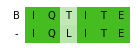

In [77]:
import matplotlib.pyplot as plt
import biotite.sequence.graphics as graphics

fig, ax = plt.subplots(figsize=(2.0, 0.8))
graphics.plot_alignment_similarity_based(
    ax, alignments[0], matrix=matrix, symbols_per_line=len(alignments[0])
)
fig.tight_layout()

We can also do some simple analysis on these objects, like determining the sequence identity or calculating the score. For further custom analysis, it can be convenient to have directly the aligned symbols codes instead of the trace.

In [78]:
alignment = alignments[0]
print("Score: ", alignment.score)
print("Recalculated score:", align.score(alignment, matrix=matrix))
print("Sequence identity:", align.get_sequence_identity(alignment))
print("Symbols:")
print(align.get_symbols(alignment))
print("symbols codes:")
print(align.get_codes(alignment))

Score:  12
Recalculated score: 12
Sequence identity: 0.8333333333333334
Symbols:
[['B', 'I', 'Q', 'T', 'I', 'T', 'E'], [None, 'I', 'Q', 'L', 'I', 'T', 'E']]
symbols codes:
[[20  7 13 16  7 16  3]
 [-1  7 13  9  7 16  3]]


We might wonder, why we should recalculate the score, when the score has already been directly calculated via align_optimal(). The answer is that we might load an alignment from a FASTA file using get_alignment(), where the score is not provided.